Agora vamos fazer a mineração de um texto e extrair palavras chaves:

In [92]:
urls=['https://link.springer.com/article/10.1007/s10115-023-01858-x',
      'https://link.springer.com/article/10.1007/s10115-023-01872-z',
      'https://link.springer.com/article/10.1007/s10115-023-01875-w',
      'https://link.springer.com/article/10.1007/s10115-023-01861-2',
      'https://link.springer.com/article/10.1007/s10115-023-01862-1',
      'https://link.springer.com/article/10.1007/s40868-022-00123-0',
      'https://link.springer.com/article/10.1007/s40868-022-00122-1',
      'https://link.springer.com/article/10.1007/s40868-022-00120-3',
      'https://link.springer.com/article/10.1007/s40868-022-00117-y']


#A GRAÇA AQUI É PEGAR ARTIGOS DE ÁREAS DIFERENTES, PRA VER SE TEM ALGUMA COISA QUE ELES ESTÃO ESTUDANDO EM COMUM!!!

Importamos algumas bibliotecas

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [94]:
text = ''
for url in urls:
    text_in = requests.get(url).content.decode('utf-8')
    text = text+text_in
#print(text[:1000])

Convertemos a linguagem de marcação html em um texto simples usando o objeto HTMLParser. 

In [95]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res

start_index = text.index("Abstract")
end_index = text.index("References")
text = text[(start_index+8):end_index]
#print(text[:1000])

Vamos extrair os insights, ou seja as palavras-chave mais significativas usando a biblioteca RAKE. 

In [96]:
import sys
!{sys.executable} -m pip install nlp_rake

Defaulting to user installation because normal site-packages is not writeable


Definiremos o comprimento mínimo de uma palavra-chave para 5 caracteres, a frequência mínima de uma palavra-chave no documento para 3 e o número máximo de palavras em uma palavra-chave para 2.

In [104]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=500,min_chars=5)
res = extractor.apply(text)
res

[]

In [105]:
!{sys.executable} -m pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


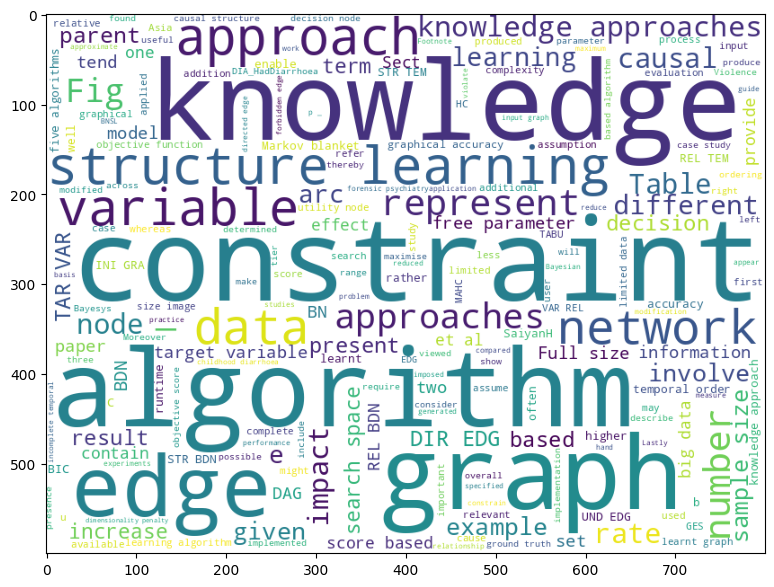

In [106]:


wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))